# Data analytics for the Business Questions

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [123]:
df = pd.read_excel("./marketing_data.xlsx")

In [124]:
df.shape

(2240, 22)

In [125]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [126]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

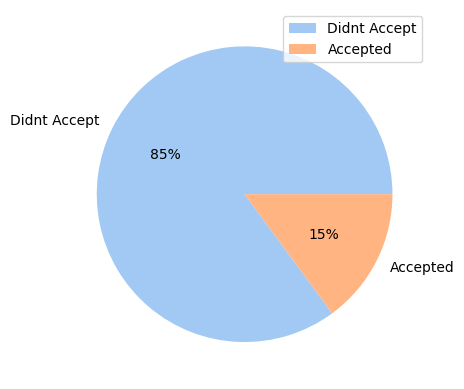

In [127]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

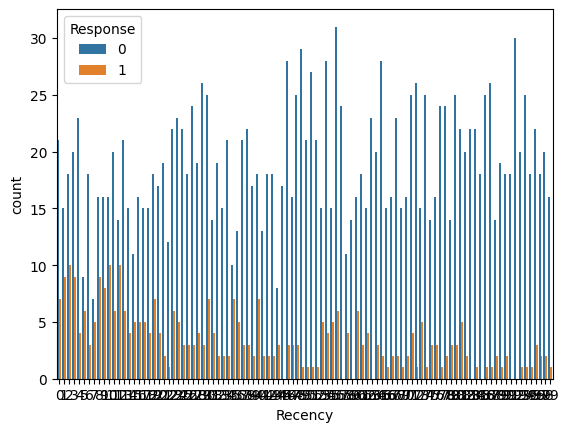

In [128]:
sns.barplot(x = 'Recency', y='count', hue = 'Response',data=df[['Recency', 'Response']].value_counts().reset_index())
plt.show()

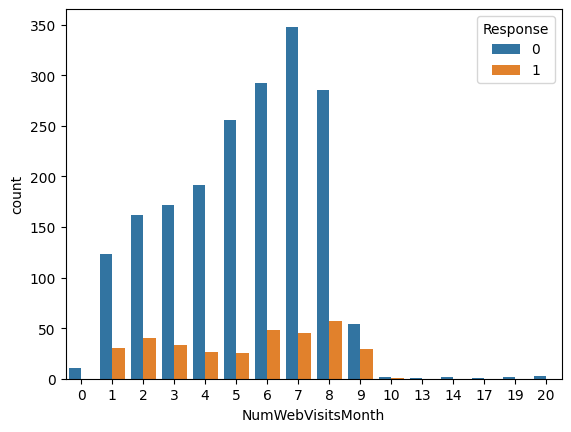

In [129]:
sns.barplot(x = 'NumWebVisitsMonth', y='count', hue = 'Response',data=df[['NumWebVisitsMonth', 'Response']].value_counts().reset_index())
plt.show()

In [130]:
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome          Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0              6/16/14        0       189 

In [131]:
df['Total_Children'] = df.loc[:, 'Kidhome'] + df.loc[:, 'Teenhome']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,1


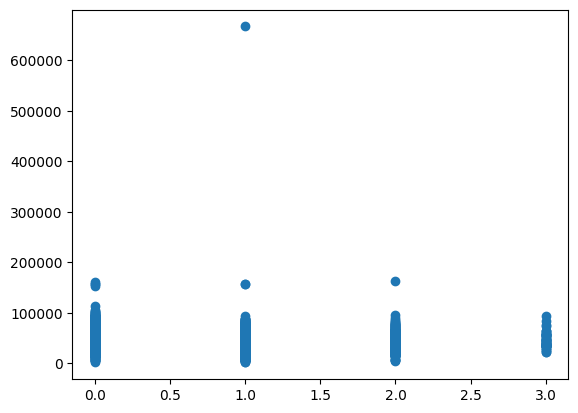

In [132]:
plt.scatter(df['Total_Children'], df['Income'])

In [133]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)